#### Notebook for verifying airspeed calculation

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from wind2watts.fit.util import fit_to_df
from wind2watts.data.util import velocity, airspeed

In [12]:
df = pd.read_csv('../../data/dataframes/strava_export/5423193666.csv', parse_dates=['timestamp'])

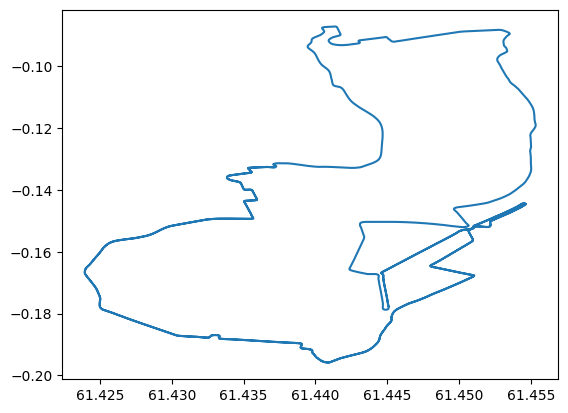

In [13]:
plt.plot(df['position_lat'], df['position_long'])

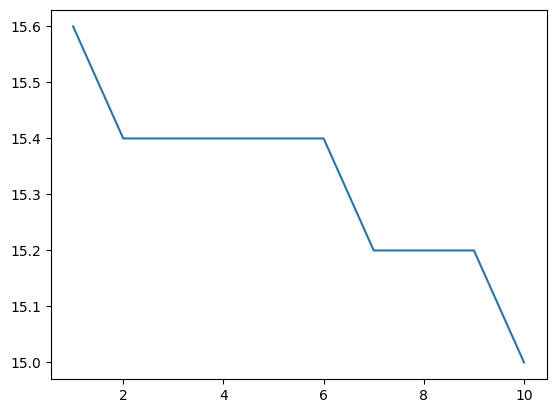

: 

In [26]:
plt.plot(df['altitude'].iloc[:10])

In [14]:
# Convert timestamp to seconds
df["timestamp"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()

speed_calc_vec, direction_vec = velocity(
    df["position_lat"].values,
    df["position_long"].values,
    df["timestamp"].values,
)

df = df.iloc[1:].copy()

df["speed_calc"], df["direction"]  = speed_calc_vec, direction_vec


df["airspeed"] = airspeed(
    df["speed_calc"].values,
    df["direction"].values,
    df["wind_speed"].values,
    df["wind_direction"].values,
)

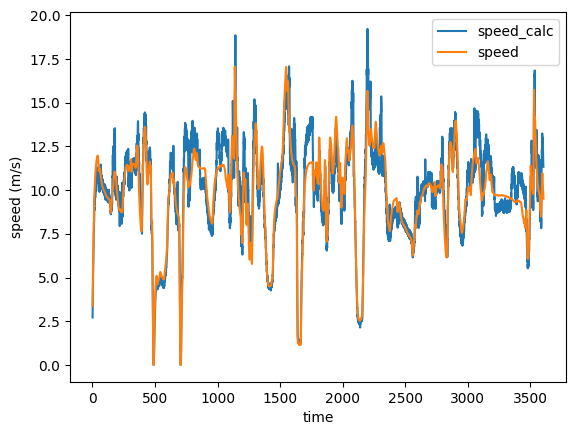

In [15]:
plt.plot(df['speed_calc'], label='speed_calc')
plt.plot(df['speed'], label='speed')

# plt.plot(df['airspeed'], label='airspeed')
plt.xlabel('time')
plt.ylabel('speed (m/s)')
plt.legend()

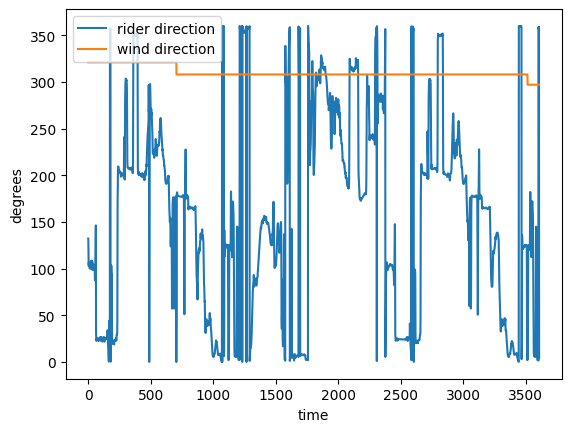

In [17]:
plt.plot(df['direction'], label='rider direction')
plt.plot(df['wind_direction'], label='wind direction')

plt.xlabel('time')
plt.ylabel('degrees')
plt.legend()